## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## EDA

In [4]:
data=pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')

In [5]:
print(len(data))

1557


In [6]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [7]:
#data.dropna(axis=1,inplace=True)
data.fillna(0,inplace=True)

In [8]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,0,1,0,0.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,0,0,...,1.0,0.0,0.0,0.0,0,0,0.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,0,0,0,House Frey,Perra Royce,...,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,0,0.0,0,0,0,House Swyft,0,...,0.0,0.0,0.0,0.0,0,1,0.0,0,0.267559,1
4,Aemma Arryn,Queen,0,0,82.0,0,0,0,House Arryn,Viserys I Targaryen,...,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,0,0,0,House Santagar,Eldon Estermont,...,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1


In [9]:
data['isPopular']=[1 if score>0.5 else 0 for score in data['popularity']]

In [10]:
data['boolDeadRelations']=[1 if num>0 else 0 for num in data['numDeadRelations'] ]

In [11]:
pd.set_option('display.max.columns',27)

In [12]:
data['culture']=data['culture'].astype(str)

In [14]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}


In [15]:

for key, values in cult.items():
    for i in values:
        data['culture']=data['culture'].str.replace(i, key, case=False) # замена без учёта регистра


In [16]:
data['culture'].unique()

array(['0', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn', 'Free Folk',
       'Northmen', 'Summer Islands', 'Braavosii', 'Dothraki',
       'Ghiscaricari', 'Vale mountain clans', 'Reach', 'Tyroshi',
       'Lhazarene', 'Ironmen', 'Qartheeneen', 'Lysene', 'Westermen',
       'Qartheen', 'Qohor', 'Westerosi', 'Norvoshihi', 'Meereenese',
       'Andal', 'Astapori', 'ironborn', 'Braavosi', 'Stormlander',
       'Valemen', 'Myrishish', 'Lhazareen', 'Sistermen',
       'Northern mountain clans', 'Vale', 'Crannogmen', 'Pentoshi'],
      dtype=object)

In [17]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [18]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,0,1,0,0.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,0.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,0,0,0,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,0,0.0,0,0,0,House Swyft,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,0.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,0,82.0,0,0,0,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,0,0,0,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0


In [19]:
data.drop(columns=
 ['dateOfBirth','mother','father','spouse',
  'isAliveMother','isAliveFather','isAliveSpouse',
  'isMarried','isNoble','popularity','numDeadRelations'
  ], inplace = True)

In [20]:
data['isAlive']

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1553,1
1554,0
1555,0


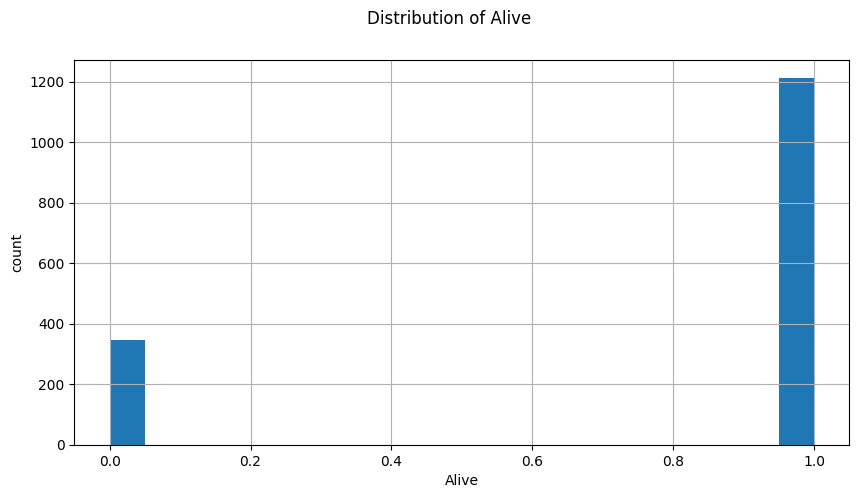

In [21]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alive')
plt.show()

In [22]:
alive_counts = data['isAlive'].value_counts(normalize=True)

# Print the percentage
print(alive_counts)



isAlive
1    0.77842
0    0.22158
Name: proportion, dtype: float64


In [23]:
print((data['name']=='Meera Reed').sum()) #Каждое имя уникальное и они не повторяются, так что зависимость между именем и целевым признаком не имеется

1


In [24]:
print((data['house']=='House Frey').sum()) # Принадлежность к определенному house имеет значение.

89


In [25]:
data.drop(columns=['name'],inplace=True)

## One-hot-encoding

In [26]:
# Categorical features
cat=['heir','culture','title','house','isPopular','male','book1','book2','book3','book4','book5','isAliveHeir','boolDeadRelations']

In [27]:
df_cat=data[cat]

In [28]:
df_cat.columns

Index(['heir', 'culture', 'title', 'house', 'isPopular', 'male', 'book1',
       'book2', 'book3', 'book4', 'book5', 'isAliveHeir', 'boolDeadRelations'],
      dtype='object')

In [29]:
unprocessed_cat_features = df_cat.select_dtypes(include=[object]).columns.tolist()


In [30]:
data[unprocessed_cat_features]

,heir,culture,title,house
S.No,,,,
1,Aegon IV Targaryen,0,0,0
2,0,Rivermen,Lord of the Crossing,House Frey
3,0,0,Ser,House Swyft
4,0,0,Queen,House Arryn
5,0,Dornish,Greenstone,House Santagar
...,...,...,...,...
1553,0,0,Archmaester,0
1554,0,0,0,0
1555,0,0,0,House Seaworth


In [31]:
data[unprocessed_cat_features]=data[unprocessed_cat_features].astype(str)

In [33]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)


In [34]:
one_hot_df.head(3)

,heir_0,heir_Aegon IV Targaryen,heir_Aegon Targaryen,heir_Aemon Targaryen,heir_Aenys Targaryen,heir_Aerys II Targaryen,heir_Arlan V Durrandon,heir_Baelor 'Breakspear' Targaryen,heir_Baelor I Targaryen,heir_Bran Stark,heir_Daeron I Targaryen,heir_Daeron II Targaryen,heir_Durran the Devout,...,house_Peach,house_Pureborn,house_Queensguard,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,male,book1,book2,book3,book4,book5,isAliveHeir,age,isAlive,isPopular,boolDeadRelations,heir_0,heir_Aegon IV Targaryen,...,house_Peach,house_Pureborn,house_Queensguard,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0.0,0.0,0,1,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,0.0,97.0,1,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0.0,0.0,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0.0,23.0,0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,0.0,29.0,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0.0,0.0,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,1,1,0,0,0,0.0,0.0,0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,0,1,1,1,1,0.0,0.0,0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_encoded['isAlive'].sum()

1212

In [37]:
df_encoded['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


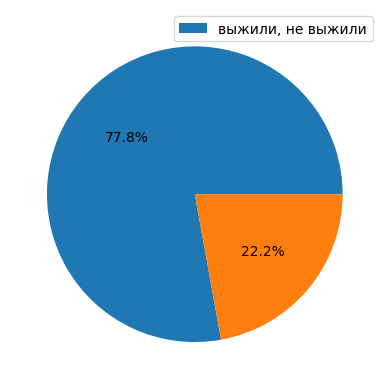

In [38]:
data = df_encoded['isAlive'].value_counts()

# Строим круговую диаграмму
plt.pie(data, autopct='%1.1f%%')

plt.legend(['выжили, не выжили'])

plt.show()

In [39]:
df_encoded[df_encoded['book1'] == 0]['isAlive'].value_counts()

,count
isAlive,
1,1069
0,272


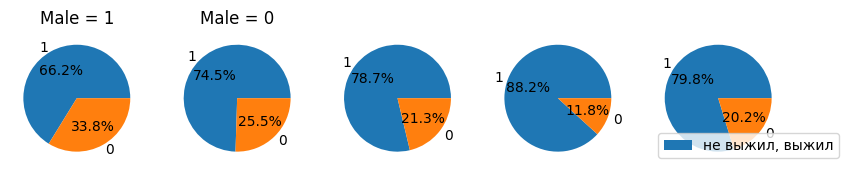

In [40]:
# Готовим данные для графика
data1=df_encoded[df_encoded['book1'] == 1]['isAlive'].value_counts()
data2=df_encoded[df_encoded['book2'] == 1]['isAlive'].value_counts()
data3=df_encoded[df_encoded['book3'] == 1]['isAlive'].value_counts()
data4=df_encoded[df_encoded['book4'] == 1]['isAlive'].value_counts()
data5=df_encoded[df_encoded['book5'] == 1]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')

ax1.set_title("Male = 1")
ax2.set_title("Male = 0")

plt.legend(['не выжил, выжил'])

plt.show()

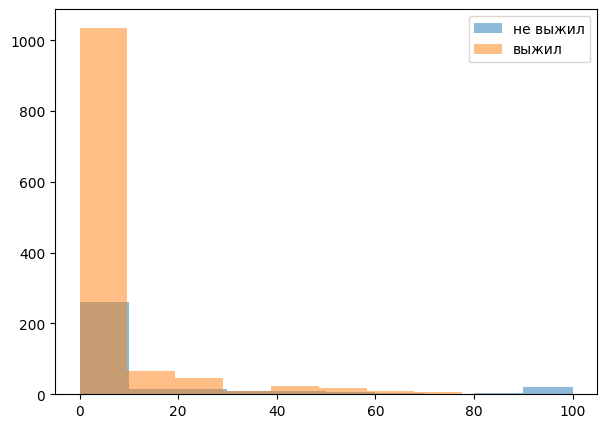

In [41]:
plt.figure(figsize=(7, 5))

plt.hist(df_encoded['age'][df_encoded['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(df_encoded['age'][df_encoded['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

## Model Creation and Training

In [43]:
X = df_encoded.drop(columns=['isAlive'])
y = df_encoded['isAlive']

In [44]:
X.shape

(1557, 580)

In [45]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234, test_size=0.2,stratify=y)

In [50]:
X_test.shape

(312, 580)

In [51]:
from sklearn.ensemble  import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [52]:
adaboost=AdaBoostClassifier(n_estimators=100, random_state=0)
randomforest=RandomForestClassifier(n_estimators=100, random_state=0)
gaussianprocess=GaussianProcessClassifier()
gaussian=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=3)
svc=SVC(kernel="linear", C=0.025)
decisiontree=DecisionTreeClassifier(max_depth=5)
# обучение модели
adaboost.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
gaussianprocess.fit(X_train, y_train)
gaussian.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train,y_train)
decisiontree.fit(X_train,y_train)

#  Предсказание на тестовых данных
y_pred_adaboost = adaboost.predict(X_test)
y_pred_randomforest=randomforest.predict(X_test)
y_pred_gaussianprocess=gaussianprocess.predict(X_test)
y_pred_gaussian=gaussian.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_decisiontree=decisiontree.predict(X_test)

## Model Evaluation

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
accuracy_gaussianprocess = accuracy_score(y_test, y_pred_gaussianprocess)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_decisiontree = accuracy_score(y_test, y_pred_decisiontree)

print("Accuracy : %.4f" % accuracy_adaboost)
print("Accuracy : %.4f" % accuracy_randomforest)
print("Accuracy : %.4f" % accuracy_gaussianprocess)
print("Accuracy : %.4f" % accuracy_gaussian)
print("Accuracy : %.4f" % accuracy_knn)
print("Accuracy : %.4f" % accuracy_svc)
print("Accuracy : %.4f" % accuracy_decisiontree)

Accuracy : 0.8013
Accuracy : 0.7917
Accuracy : 0.8045
Accuracy : 0.4038
Accuracy : 0.7724
Accuracy : 0.7821
Accuracy : 0.8045
